# sktime - AUnified Framework for Machine Learning with Time Series

## Prelude : Cross-sectinoal regressino with scikit-learn
### Data 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [6]:
diabates = load_diabetes()

X = diabates["data"]
y = diabates["target"]

print(X.shape, y.shape)

(442, 10) (442,)


In [8]:
pd.DataFrame(X, columns=diabates["feature_names"]).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


[Text(0.5, 0, 'blood serum measurement: s2'),
 Text(0, 0.5, 'disease progression')]

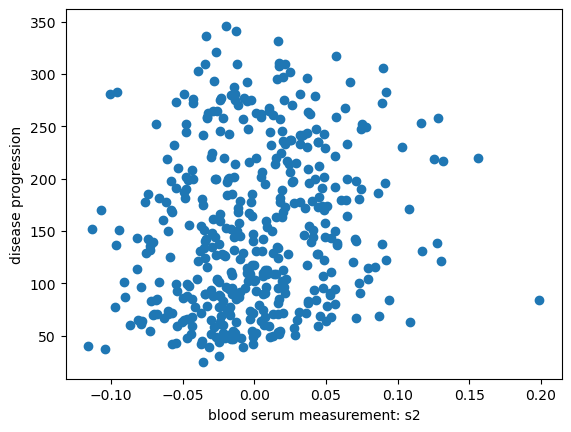

In [11]:
fig, ax = plt.subplots()
col = 5
ax.scatter(X[:,col], y)
ax.set(
    xlabel = f"blood serum measurement: {diabates['feature_names'][col]}",
    ylabel="disease progression"
)

### Workflow
1. Model specification
2. Fitting
3. Prediction
4. Evaluation

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [13]:
classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
y_pred = classifier.predict(X_test)

In [16]:
mean_squared_error(y_test, y_pred)

2637.3167828828823

### Modular model building
- Pipelining & transformers
- Tuning
- Ensembling

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [19]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred)

2612.446486486487

### Summary
- cross-sectional input data, without any assumed temporal dependency or ordering
- three learning tasks: cross-sectional classification, regression and clustering
- a common estimator API for each learning task
- estimator APIs mirror learning tasks

## 1 - Introduction to Machine Leaning with Time Series

### Multiple data formats

In [20]:
from sktime.datasets import load_lynx
from sktime.utils.plotting import plot_series

#### Univariate data
 Repeated observations over time from a single variable or kind of measurement

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of Lynx trappings'>)

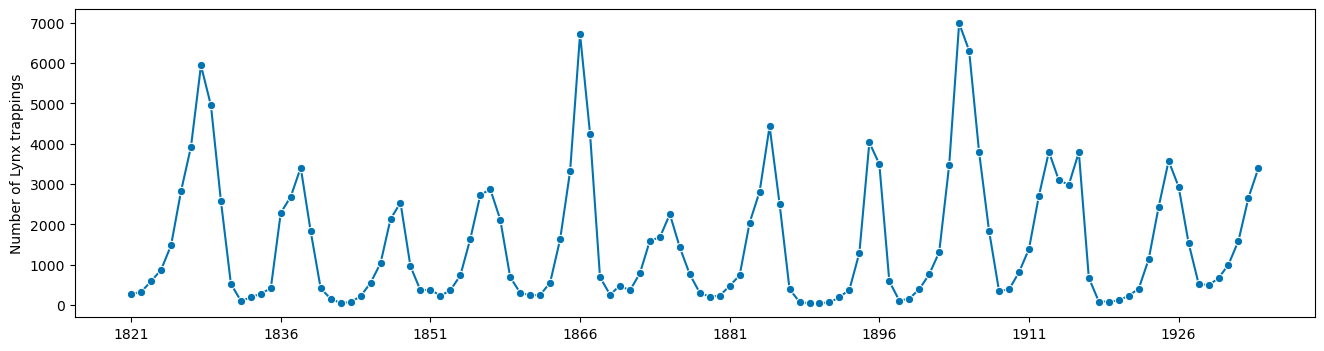

In [21]:
y =load_lynx()
plot_series(y)

In [24]:
print(y, type(y))

1821     269.0
1822     321.0
1823     585.0
1824     871.0
1825    1475.0
         ...  
1930     662.0
1931    1000.0
1932    1590.0
1933    2657.0
1934    3396.0
Freq: A-DEC, Name: Number of Lynx trappings, Length: 114, dtype: float64 <class 'pandas.core.series.Series'>


#### Multivariate data
Repeated observations over time from multiple related variables or kinds of measurement

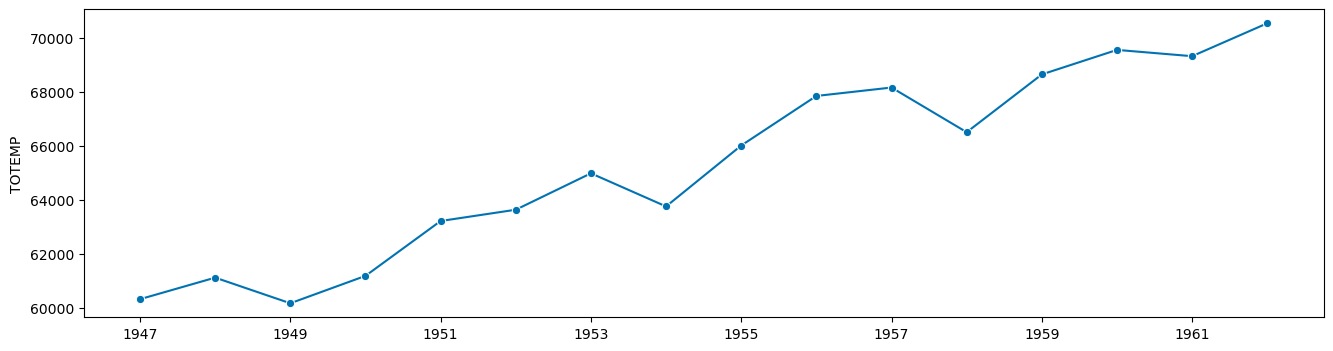

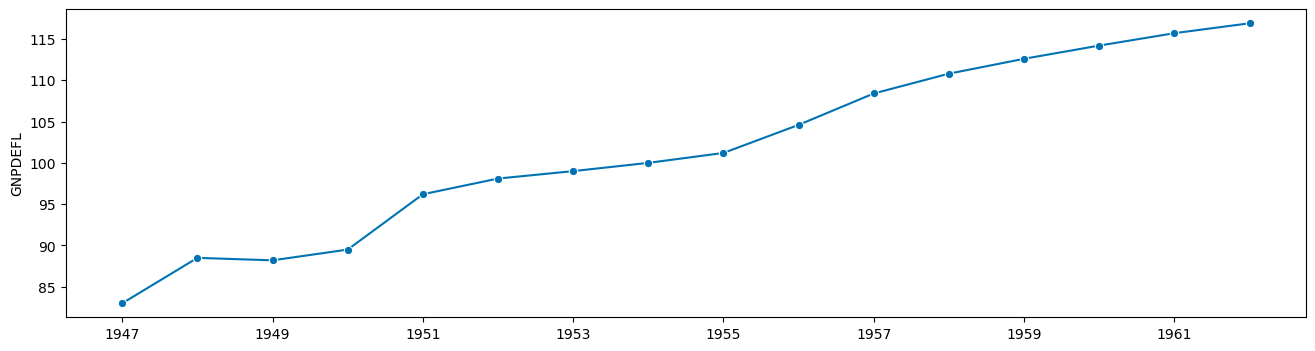

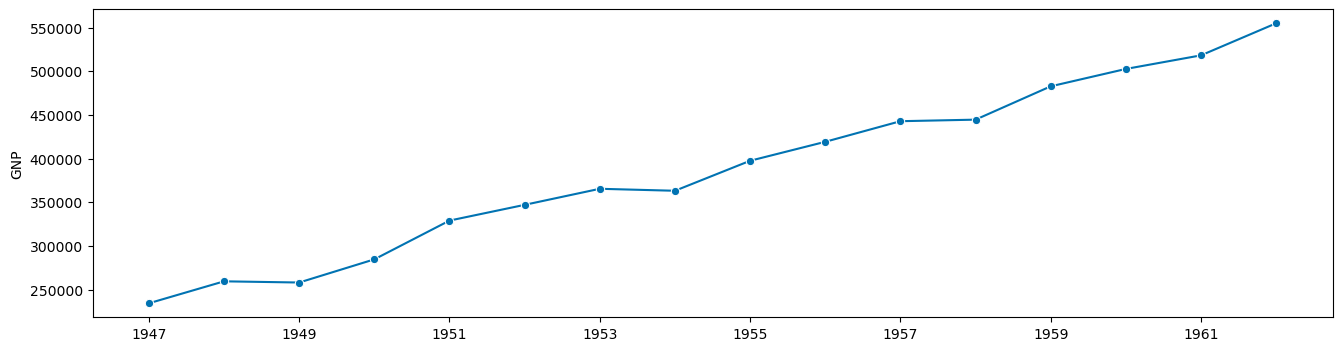

In [26]:
from sktime.datasets import load_longley

y, X = load_longley()

plot_series(y)
for collumn in X.columns[:2]:
    x = X[collumn]
    plot_series(x)

#### Panel data 
Repeated observations over time on multiple independent experimental units from one or more related variables or kinds of measurement

In [27]:
import matplotlib.pyplot as plt
from sktime.datasets import load_arrow_head
from sktime.datatypes import convert

In [33]:
X, y = load_arrow_head(return_X_y=True)
print(type(X), type(y))
X

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


,dim_0
0,0 -1.963009 1 -1.957825 2 -1.95614...
1,0 -1.774571 1 -1.774036 2 -1.77658...
2,0 -1.866021 1 -1.841991 2 -1.83502...
3,0 -2.073758 1 -2.073301 2 -2.04460...
4,0 -1.746255 1 -1.741263 2 -1.72274...
...,...
206,0 -1.625142 1 -1.622988 2 -1.62606...
207,0 -1.657757 1 -1.664673 2 -1.63264...
208,0 -1.603279 1 -1.587365 2 -1.57740...
209,0 -1.739020 1 -1.741534 2 -1.73286...


In [34]:
X = convert(X, from_type="nested_univ", to_type="numpy3D")
X

array([[[-1.9630089, -1.9578249, -1.9561449, ..., -1.9053929,
         -1.9239049, -1.9091529]],

       [[-1.7745713, -1.7740359, -1.7765863, ..., -1.7292269,
         -1.7756704, -1.7893245]],

       [[-1.8660211, -1.8419912, -1.8350253, ..., -1.8625124,
         -1.8633682, -1.8464925]],

       ...,

       [[-1.6032789, -1.5873654, -1.5774074, ..., -1.6030858,
         -1.6053821, -1.6055967]],

       [[-1.7390199, -1.7415336, -1.7328633, ..., -1.6998703,
         -1.7131185, -1.7281761]],

       [[-1.6307269, -1.6299183, -1.6205557, ..., -1.5815764,
         -1.5952728, -1.6207831]]])

[Text(0, 0.5, 'Scaled distance from midpoint'), Text(0.5, 0, 'Index')]

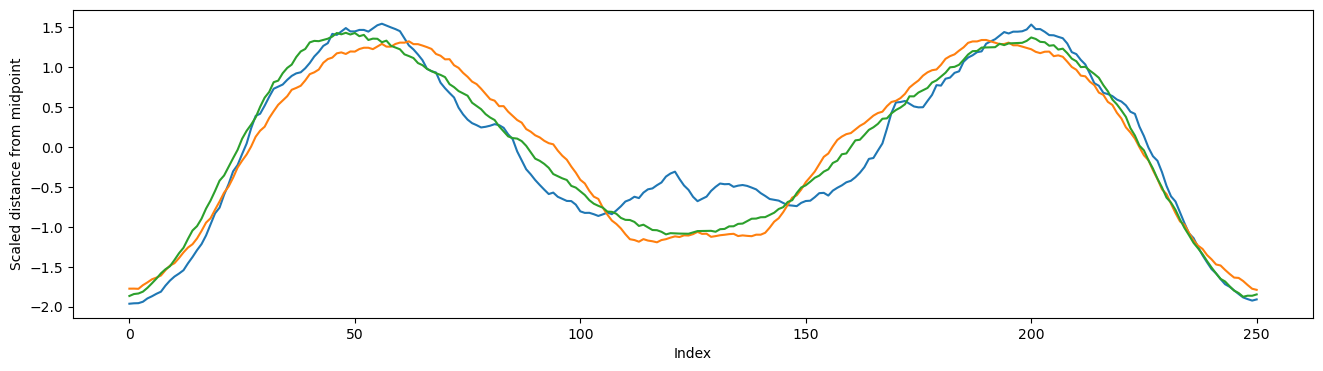

In [36]:
labels, counts = np.unique(y, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    ax.plot(X[y == label, 0, :][0], label=f"class {label}")
ax.set(ylabel="Scaled distance from midpoint", xlabel="Index")